In [1]:
import os
import pandas as pd

os.chdir("C:/Users/ewu/Documents/Hackathon/SIDER")

In [2]:
drug_names = pd.read_csv("drug_names.tsv", sep = '\t', names = [i for i in range(2)])
drug_names.head()

,0,1
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate


In [3]:
meddra_all_se = pd.read_csv("meddra_all_se.tsv", sep = '\t', names = [i for i in range(6)])
meddra_all_se.head()

,0,1,2,3,4,5
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain


In [4]:
drug_side_effect = drug_names.merge(meddra_all_se, on = 0)[[0, '1_x', '1_y', 5]]
drug_side_effect.rename({0: "joining_CID_code", "1_x": "drug_name", "1_y": "the_other_CID_code", 5: "Side_effect"}, inplace = True, axis = 1)
drug_side_effect_map = drug_side_effect.groupby('drug_name')['Side_effect'].apply(set).reset_index()
drug_side_effect_map['Side_effect'] = drug_side_effect_map['Side_effect'].str.join(" ")
drug_side_effect_map['drug_name'] = drug_side_effect_map['drug_name'].str.lower()
drug_side_effect_map.head()

,drug_name,Side_effect
0,"1,25(oh)2d3",Thirst Haemorrhage Conjunctivitis Gastrointest...
1,17-hydroxyprogesterone,Chest discomfort Dyspnoea Injection site swell...
2,18f-fdg,Hypotension Pruritus Rash Dermatitis Hypersens...
3,18f-flutemetamol,Dyspnoea Blood pressure increased Hypersensiti...
4,2-hydroxysuccinaldehyde,Injection site irritation Pruritus Artificial ...


In [6]:
os.chdir("C:/Users/ewu/Documents/Hackathon/drugbank/data")
drugbank_data_full = pd.read_csv("drugbank.tsv", sep='\t')
drugbank_data_full['name'] = drugbank_data_full['name'].str.lower()
drugbank_data_full.head()

,drugbank_id,name,type,groups,atc_codes,categories,inchikey,inchi,description
0,DB00001,lepirudin,biotech,approved,B01AE02,Antithrombins|Fibrinolytic Agents,NaN,NaN,Lepirudin is identical to natural hirudin exce...
1,DB00002,cetuximab,biotech,approved,L01XC06,Antineoplastic Agents,NaN,NaN,Epidermal growth factor receptor binding FAB. ...
2,DB00003,dornase alfa,biotech,approved,R05CB13,Enzymes,NaN,NaN,Dornase alfa is a biosynthetic form of human d...
3,DB00004,denileukin diftitox,biotech,approved|investigational,L01XX29,Antineoplastic Agents,NaN,NaN,A recombinant DNA-derived cytotoxic protein co...
4,DB00005,etanercept,biotech,approved|investigational,L04AB01,Immunosuppressive Agents,NaN,NaN,Dimeric fusion protein consisting of the extra...


In [9]:
side_effect_drugbank_map = drug_side_effect_map.merge(drugbank_data_full, left_on = 'drug_name', right_on = 'name')[['drug_name', 'Side_effect', 'type', "groups", "atc_codes", "categories"]]
side_effect_drugbank_map.head()

,drug_name,Side_effect,type,groups,atc_codes,categories
0,5-methyltetrahydrofolate,Sensitisation,small molecule,experimental,NaN,NaN
1,an2690,Application site erythema Application site ras...,small molecule,investigational,NaN,NaN
2,abarelix,Urinary tract infection Sleep disorder Hyperse...,biotech,approved|investigational|withdrawn,L02BX01,Anti-Testosterone Agents
3,anidulafungin,Sinus arrhythmia Hepatic necrosis Insomnia Cho...,small molecule,approved|investigational,J02AX06,Antifungal Agents
4,bivalirudin,Haemorrhage intracranial VIIth nerve paralysis...,biotech,approved|investigational,B01AE06,Antithrombins


In [11]:
import matplotlib.pyplot as plt
import nltk

list_of_words = side_effect_drugbank_map['Side_effect'].tolist()
list_of_words = [i.split(" ") for i in list_of_words]
list_of_words = [i for sublist in list_of_words for i in sublist]

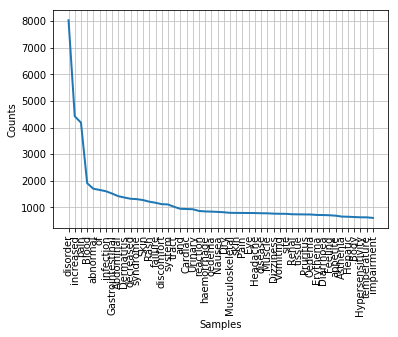

In [12]:
# 1st plot!
fdist1 = nltk.FreqDist(list_of_words)
fdist1.plot(50)